<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC10%E7%AB%A0%E7%B7%B4%E7%BF%92%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('Bank.csv')
print(df.shape)
df.head()




(23215, 16)


,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756.0,yes,no,cellular,3.0,apr,370.055237,1.0,0.0,1.0
1,2,51,entrepreneur,married,primary,no,1443.0,no,no,cellular,18.0,feb,233.998933,10.0,0.0,1.0
2,3,36,management,single,tertiary,no,436.0,no,no,cellular,13.0,apr,NaN,1.0,2.0,0.0
3,4,63,retired,married,secondary,no,474.0,no,no,cellular,25.0,jan,252.525808,1.0,0.0,0.0
4,5,31,management,single,tertiary,no,354.0,no,no,cellular,30.0,apr,NaN,1.0,2.0,0.0


In [79]:
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name=['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True)

num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)

In [80]:
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
5033,5034,46,174.0,8.0,343.311717,1.0,0.0,0.0,0,0,...,0,0,management,no,married,secondary,yes,no,cellular,may
4547,4548,32,329.0,17.0,260.329804,1.0,0.0,0.0,0,0,...,0,0,student,no,single,secondary,yes,no,cellular,apr
19987,19988,34,2918.0,4.0,267.490412,1.0,2.0,0.0,0,0,...,0,0,services,no,married,secondary,no,yes,cellular,jun
14680,14681,52,425.0,28.0,408.593120,2.0,3.0,1.0,0,0,...,0,0,technician,no,married,unknown,yes,no,cellular,jan
926,927,58,111.0,22.0,280.108939,1.0,2.0,0.0,0,0,...,0,0,management,no,married,secondary,no,no,telephone,jun


In [81]:
#欠損値の確認
is_nan=train_val.isnull().sum()
#欠損が存在している列だけ表示
is_nan[is_nan>0]

day            1
duration    5434
campaign       1
previous       1
y              1
housing        1
loan           1
contact        1
month          1
dtype: int64

In [ ]:
# 改善案1  欠損値の補完方法を線形回帰で行ってみる。
# 多すぎる。

In [53]:
#相関係数を調べる

train_val.corr()['duration']



<ipython-input-53-1bfcd707d0f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_val.corr()['duration']


id                           0.010115
age                          0.209293
amount                      -0.036686
day                         -0.023381
duration                     1.000000
campaign                    -0.017503
previous                     0.093119
y                            0.275203
job_blue-collar              0.086331
job_entrepreneur             0.013453
job_housemaid               -0.037685
job_management              -0.037119
job_retired                  0.028424
job_self-employed           -0.011185
job_services                 0.011996
job_student                 -0.113832
job_technician              -0.017271
job_unemployed              -0.044641
job_unknown                 -0.049846
default_yes                  0.012398
marital_married              0.114267
marital_single              -0.166798
education_secondary          0.032874
education_tertiary          -0.081727
education_unknown           -0.010305
housing_yes                  0.560093
loan_yes    

In [54]:
train_val.corr()['duration'].map(abs).sort_values(ascending=False)

<ipython-input-54-a56f5293d84b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_val.corr()['duration'].map(abs).sort_values(ascending=False)


duration                     1.000000
housing_yes                  0.560093
loan_yes                     0.375748
y                            0.275203
age                          0.209293
month_aug                    0.187221
month_may                    0.184235
marital_single               0.166798
marital_married              0.114267
job_student                  0.113832
previous                     0.093119
contact_sending _document    0.088394
job_blue-collar              0.086331
education_tertiary           0.081727
month_jun                    0.066313
month_oct                    0.050594
job_unknown                  0.049846
job_unemployed               0.044641
month_mar                    0.040915
job_housemaid                0.037685
job_management               0.037119
amount                       0.036686
education_secondary          0.032874
job_retired                  0.028424
month_dec                    0.026111
day                          0.023381
month_feb   

In [55]:
#特徴量の当たりがついた
#しかし、そもそもこの線形回帰は外れ値の影響を強く受けるので調べる。

#特徴量の当たりがついた
#しかし、そもそもこの線形回帰は外れ値の影響を強く受けるので調べる。

from sklearn.covariance import MinCovDet
num_df=train_val.drop(str_col_name,axis=1)
num_df=num_df.drop('id',axis=1)
num_df2=num_df.dropna()
mcd2 =MinCovDet(random_state=0,support_fraction=0.7)
mcd2.fit(num_df2)

MinCovDet(random_state=0, support_fraction=0.7)

<Axes: >

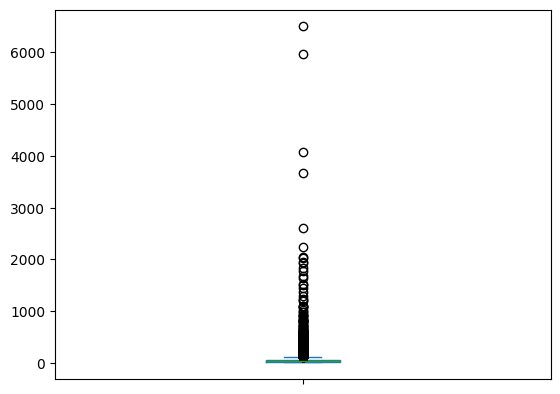

In [56]:
dis =mcd2.mahalanobis(num_df2)
dis=pd.Series(dis)
dis.plot(kind="box")

In [66]:
print(dis[0:3])#先頭は0番からのラベル
no=dis[dis>5000].index
no[0]

0     21.648262
1    114.601825
2     41.212212
dtype: float64


3540

In [67]:
#先頭から3540番目が外れ値となる事が分かったので９章の付録で紹介したilocを利用する
no=num_df2.iloc[no[0]:(no[0]+1),:].index
train_val2 = train_val.drop(no)

In [59]:
train_val2.corr()['duration'].map(abs).sort_values(ascending=False)

<ipython-input-59-93de81f7e159>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_val2.corr()['duration'].map(abs).sort_values(ascending=False)


duration                     1.000000
housing_yes                  0.560084
loan_yes                     0.375858
y                            0.275082
age                          0.209451
month_aug                    0.187201
month_may                    0.184355
marital_single               0.167051
marital_married              0.114452
job_student                  0.113833
previous                     0.091885
contact_sending _document    0.088493
job_blue-collar              0.086413
education_tertiary           0.081953
month_jun                    0.066277
month_oct                    0.050584
job_unknown                  0.049843
job_unemployed               0.044626
month_mar                    0.040907
job_housemaid                0.037668
job_management               0.037388
amount                       0.036650
education_secondary          0.033014
job_retired                  0.028459
month_dec                    0.026106
day                          0.023606
month_feb   

In [68]:
#monthはdurationに本質的に影響あるとは思えないので特徴量を
#housing_yes ,loan_yes,age,marital_single ,job_student    とする。（ｙは最終的な正解データなので除外）    

#欠損行を削除
not_nan_df = train_val2.dropna()
temp_t =not_nan_df['duration']
temp_x = not_nan_df[['housing_yes','loan_yes','age','marital_single' ,'job_student']]
# 線形回帰
from sklearn.linear_model import LinearRegression
model_liner = LinearRegression()

a,b,c,d= train_test_split(temp_x,temp_t,random_state=0,test_size=0.2)

#今回は予測させたいだけなので、標準化はしない
model_liner.fit(a,c)
print(model_liner.score(a,c),model_liner.score(b,d))

0.7200201292203426 0.7402520091900442


In [69]:
# コード修正(不要なので削除)

# tain_val2 = train_val.copy()

is_null=train_val2['duration'].isnull()
non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(non_x)
train_val2.loc[is_null,'duration']=pred_d

<Axes: ylabel='Frequency'>

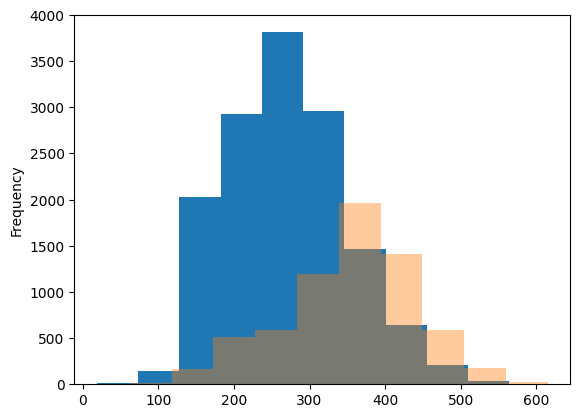

In [34]:
#ヒストグラムの確認
train_val2.loc[train_val['y']==0,"duration"].plot(kind="hist")
train_val2.loc[train_val['y']==1,"duration"].plot(kind="hist",alpha=0.4)

#y=1の方が、durationが大きい傾向がやっぱりありそう

In [83]:
#まず、さくっと学習できるようなlearn関数を定義する。
def learn(x,t,i):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    #不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(random_state=i,max_depth=i,class_weight='balanced')
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    
    
    val_score=model.score(x_val,y_val)
    return train_score,val_score,model,datas

    

In [87]:
t =train_val2['y']
x = train_val2.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)

In [88]:
tmp = train_val2.isnull()
tmp.sum()

id                           0
age                          0
amount                       0
day                          1
duration                     0
campaign                     1
previous                     1
y                            1
job_blue-collar              0
job_entrepreneur             0
job_housemaid                0
job_management               0
job_retired                  0
job_self-employed            0
job_services                 0
job_student                  0
job_technician               0
job_unemployed               0
job_unknown                  0
default_yes                  0
marital_married              0
marital_single               0
education_secondary          0
education_tertiary           0
education_unknown            0
housing_yes                  0
loan_yes                     0
contact_sending _document    0
contact_telephone            0
month_aug                    0
month_dec                    0
month_feb                    0
month_ja

In [70]:
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
for i in range(1,15):
    s1,s2,model,datas = learn(x,t,i)
    print(i,s1,s2)

ValueError: ignored

In [89]:
#テストデータでも調べる
test2 = test.copy()
isnull=test2['duration'].isnull()
model_tree=tree.DecisionTreeClassifier(random_state=10,max_depth=10,class_weight="balanced")
if isnull.sum()>0:
    temp_x=test2.loc[isnull,['housing_yes','loan_yes','age','marital_single','job_student']]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d
x_test = test2.drop(str_col_name,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']

model.score(x_test,y_test)


NameError: ignored